# Problem Statement:

* Business want to predict sales volum based on expenditure done in different advertisment mode (TV / Radio/ Newspaper)

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error,  mean_squared_error

%matplotlib inline

In [92]:
path = r"C:\Users\javed.s\Desktop\Rough\d\advertisment.xlsx"

In [93]:
# loading data 
df = pd.read_excel(path)

In [94]:
# view datasets
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [95]:
# Data understanding

In [96]:
# checking shape
df.shape

(200, 4)

In [97]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [98]:
# data is very much clean for modeling

In [99]:
# basic EDA
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

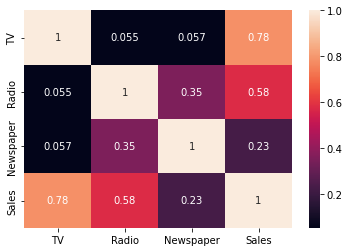

In [100]:
sns.heatmap(df.corr(), annot=True)

In [101]:
# Data preprocissing

In [102]:
X = df.drop(columns = ['Sales'])
y = df['Sales']

In [103]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [104]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [105]:
# split data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state= 4)

In [106]:
lin_model = LinearRegression()

In [107]:
# fit the data to model
lin_model.fit(X_train, y_train)

LinearRegression()

In [108]:
# making prediction
test_prediction = lin_model.predict(X_test)
train_prediction = lin_model.predict(X_train)

In [109]:
test_prediction

array([17.09777441, 16.86148273, 21.7761552 , 24.53812602, 12.32008724,
       20.9083371 , 10.09857022, 12.38326275, 12.01767713, 16.939182  ,
       22.8039863 , 15.18438755,  8.45988902, 14.86958246, 18.5360064 ,
       18.5391287 , 18.67614759, 14.5131948 ,  9.74192603, 20.57441729,
       14.89243548, 17.70102466, 23.04193509,  7.718106  , 21.42075683,
       19.62792915, 13.79733409, 11.63827129, 18.42655599, 12.19463761,
       11.40777433,  9.96083851, 13.49436555, 15.18912412, 18.09830593,
        6.92815403, 14.21050378, 14.27217178, 14.10451207, 10.77723418,
       14.82936609, 11.96507878, 10.69651541, 10.40851022,  6.21159776,
       16.82112487, 16.4659736 , 12.07626636, 10.75281419, 20.84690688,
       15.09266208, 15.39499668, 13.27964587, 14.1081843 , 12.38574411,
        9.03289588, 20.48246311,  9.3517132 ,  5.36311192,  8.24848891])

In [110]:
# checking score
test_score = r2_score(y_test, test_prediction)
train_score = r2_score(y_train, train_prediction)

print('Test Score:',test_score)
print('Train score :', train_score)

Test Score: 0.9127220729596172
Train score : 0.8890066696510228


In [111]:
# some issues of overfitting, but linear model does not have hyper parameter tune it, we can use gradient decent alogorithm , will use later

In [112]:
MAE = mean_absolute_error(y_test, test_prediction)
MSE = mean_squared_error(y_test, test_prediction)
RMSE = np.sqrt(MSE)

print('Average Sales :',df['Sales'].mean())
print('MAE           : ',MAE)
print('MSE           : ',MSE)
print('RMSE          : ',RMSE)

Average Sales : 14.022500000000003
MAE           :  1.211152512498049
MSE           :  2.2237746679115578
RMSE          :  1.4912326002041256


In [113]:
# is the above metrics give confidance to use linear model, well let see  plot residual to check datasets is useful to use linear model

In [114]:
residual = y_test - test_prediction

C:\Users\javed.s\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

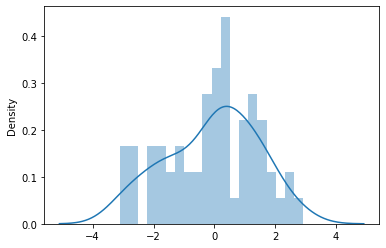

In [115]:
sns.distplot(x = residual, bins = 20, kde = True)

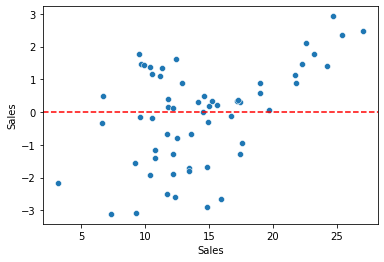

In [116]:
sns.scatterplot(x = 'Sales', y = residual , data = df)
plt.axhline(y = 0, color = 'red', ls = '--')

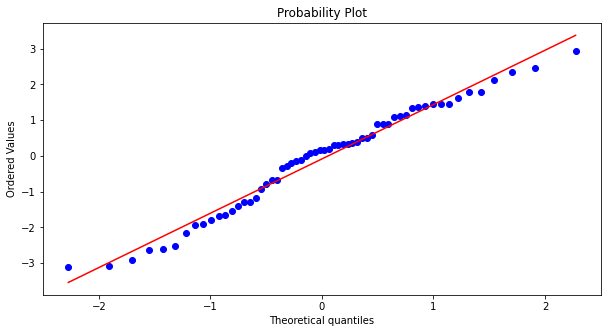

In [117]:
fig, ax = plt.subplots(figsize = (10,5))
_ = sp.stats.probplot(residual, plot = ax)

In [118]:
# fitting model to entire dataset
final_model = LinearRegression()

In [119]:
final_model.fit(X , y)

LinearRegression()

In [120]:
final_prediction = final_model.predict(X)

In [121]:
final_score = r2_score(y, final_prediction)
final_score

0.8972106381789522

In [122]:
final_residual = y - final_prediction

C:\Users\javed.s\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

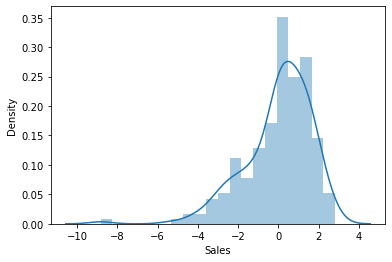

In [123]:
sns.distplot(final_residual, bins = 20, kde = True)

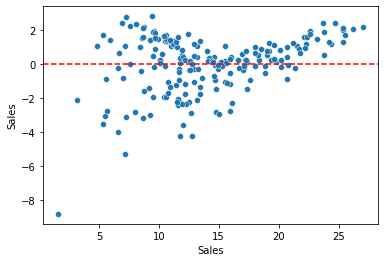

In [124]:
sns.scatterplot( x = y, y = final_residual, data = df)
plt.axhline(y = 0, color = 'red',ls = '--')

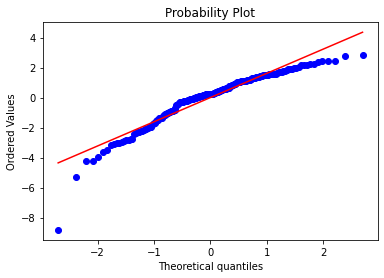

In [125]:
fig, ax = plt.subplots()
_ = sp.stats.probplot(final_residual, plot = ax)

In [126]:
# from above its looks data set is not perfectly fit to linear model, we will check with polynomial model later

In [127]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [128]:
coeff = pd.DataFrame(final_model.coef_ , X.columns, columns = ['Coefficient'])
coeff

,Coefficient
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


In [129]:
new_data = [[230.1,37.8,22.2]]

In [130]:
df.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Sales         22.1
Name: 0, dtype: float64

In [131]:
final_model.predict(new_data)

array([20.57273658])

In [132]:
# Saving and loading model for future use
from joblib import dump, load

In [133]:
dump(final_model, 'final_prediction_sales.joblib')

['final_prediction_sales.joblib']

In [134]:
loaded_model = load('final_prediction_sales.joblib')

In [135]:
loaded_model.predict(new_data)

array([20.57273658])

# Polynomial Regression

In [136]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [137]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [138]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [139]:
poly_convertor = PolynomialFeatures(degree=2, include_bias = False)

In [140]:
poly_feature = poly_convertor.fit_transform(X)

In [141]:
poly_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [142]:
X.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [143]:
230**2

52900

In [144]:
230 * 37.8

8694.0

In [145]:
# split data set into train and test
X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size = 0.30, random_state= 4)

In [146]:
print(X_train.shape)
print(y_train.shape)

(140, 9)
(140,)


In [147]:
poly_model = LinearRegression()

In [148]:
poly_model.fit(X_train, y_train)

LinearRegression()

In [149]:
# making prediction
test_prediction_poly  =  poly_model.predict(X_test)
train_prediction_poly = poly_model.predict(X_train)

In [150]:
# checking score
test_score_poly = r2_score(y_test, test_prediction_poly)
train_score_poly = r2_score(y_train, train_prediction_poly)

print('Test Score:',test_score_poly)
print('Train score :', train_score_poly)

Test Score: 0.9852695559335903
Train score : 0.9863409020800089


In [151]:
PMAE = mean_absolute_error(y_test, test_prediction_poly)
PMSE = mean_squared_error(y_test, test_prediction_poly)
PRMSE = np.sqrt(PMSE)

print('Average Sales :',df['Sales'].mean())
print('MAE           : ',PMAE)
print('MSE           : ',PMSE)
print('RMSE          : ',PRMSE)

Average Sales : 14.022500000000003
MAE           :  0.4668158603765839
MSE           :  0.375320421471666
RMSE          :  0.6126340028693037


In [152]:
# Comparing metrics between Linear model  and poly model

In [153]:
print('linear model MAE ', MAE , 'Poly model MAE ', PMAE)
print('linear model MSE ', MSE , 'Poly model MSE ', PMSE)
print('linear model RMSE ', RMSE , 'Poly model RMSE ', PMSE)

linear model MAE  1.211152512498049 Poly model MAE  0.4668158603765839
linear model MSE  2.2237746679115578 Poly model MSE  0.375320421471666
linear model RMSE  1.4912326002041256 Poly model RMSE  0.375320421471666


In [154]:
poly_residual = y_test - test_score_poly

C:\Users\javed.s\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

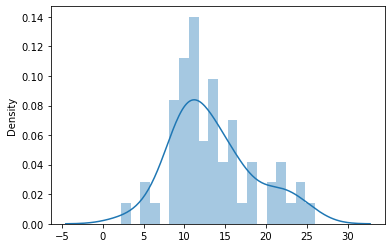

In [155]:
sns.distplot(x = poly_residual, bins = 20, kde = True)

<AxesSubplot:xlabel='Sales', ylabel='Sales'>

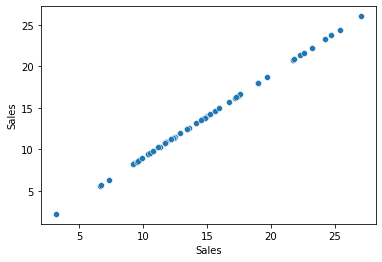

In [156]:
sns.scatterplot(x = 'Sales', y = poly_residual,data = df)

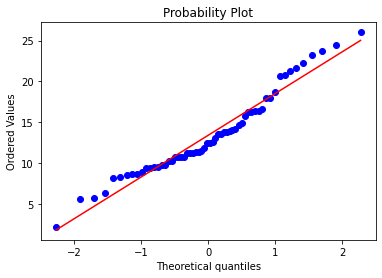

In [157]:
fig, ax = plt.subplots()
_ = sp.stats.probplot(poly_residual, plot = ax)

In [160]:
# potimising hyper degree

poly_test_rmse_error = []
poly_train_rmse_erorr = []

for d in range(1,10):
    poly_convertor = PolynomialFeatures(degree=d, include_bias = False)
    poly_feature = poly_convertor.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size = 0.30, random_state= 4)
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    test_prediction_poly  =  poly_model.predict(X_test)
    train_prediction_poly = poly_model.predict(X_train)
    test_rmse_error = np.sqrt(mean_squared_error(y_test , test_prediction_poly))
    train_rmse_error = np.sqrt(mean_squared_error(y_train, train_prediction_poly))
    
    poly_test_rmse_error.append(test_rmse_error)
    poly_train_rmse_erorr.append(train_rmse_error)

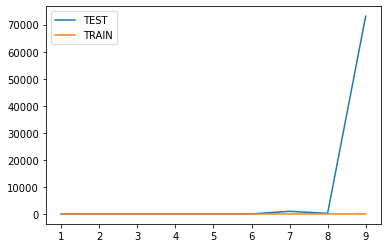

In [161]:
plt.plot(range(1,10), poly_test_rmse_error, label = 'TEST' )
plt.plot(range(1,10), poly_train_rmse_erorr, label = 'TRAIN' )
plt.legend()

(0.0, 100.0)

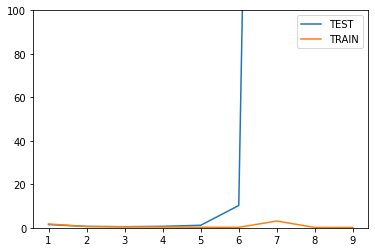

In [162]:
plt.plot(range(1,10), poly_test_rmse_error, label = 'TEST' )
plt.plot(range(1,10), poly_train_rmse_erorr, label = 'TRAIN' )
plt.legend()
plt.ylim(0,100)

In [163]:
# final Poly model

In [164]:
final_converter = PolynomialFeatures(degree=4, include_bias=False)

In [165]:
final_feature = final_converter.fit_transform(X)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(final_feature, y, test_size = 0.30, random_state= 4)

In [167]:
final_poly_model = LinearRegression()
final_poly_model.fit(X_train, y_train)

LinearRegression()

In [170]:
poly_data = [[230.1,37.8,69.2]]

In [169]:
X.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [171]:
x= final_converter.transform(poly_data)

In [172]:
x

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
        8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
        4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
        3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05, 2.80327997e+09,
        4.60512747e+08, 8.43055082e+08, 7.56513769e+07, 1.38494055e+08,
        2.53539381e+08, 1.24277360e+07, 2.27513050e+07, 4.16505372e+07,
        7.62491316e+07, 2.04158375e+06, 3.73750252e+06, 6.84220038e+06,
        1.25259330e+07, 2.29310730e+07]])

In [173]:
final_poly_model.predict(x)

array([21.78479841])

In [174]:
df.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Sales         22.1
Name: 0, dtype: float64

In [175]:
# save and Load
from joblib import dump, load

In [176]:
dump(final_converter,'poly_converter.joblib')
dump(final_poly_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [177]:
converter = load('poly_converter.joblib')
predictor = load('final_poly_model.joblib')

In [178]:
predictor.predict(converter.transform(poly_data))

array([21.78479841])